# This file is for testing the SIO PCW for an MZM

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', '..')))
import optomization as opt
import legume
import json 
import numpy as np 
import matplotlib.pyplot as plt 

In [46]:
a = 400#390
phc = opt.W1(NyChange=0,Ny=7,ra=220/2/a,eps_slab=3.4784,eps_clad=1.44427,dslab=220/a)

In [47]:
ks = np.linspace(np.pi*.5,np.pi,200)
gmax = 4.001
gmeParams = {'verbose':True,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack([ks,[0]*len(ks)])}

phc = opt.W1(NyChange=0,Ny=7,eps_slab=3.48,eps_clad=1.44)
gme = legume.GuidedModeExp(phc,gmax=gmax)
gme.run(**gmeParams)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 589 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 35.776   │ │--------------------│    4% │
│ Inverse matrix of Fourier-space permittivity               │ 0.112    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 802.351  │ │████████████████----│   84% │
│ Creating GME matrix                                        │ 114.620  │ │██------------------│   12% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 200 k-points   │ 953.371  │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

In [11]:
import pickle

# Save the gme and ngs objects to a pickle file
with open("SIOTesting.pkl", "wb") as f:
    pickle.dump({'gme': gme, 'ngs': ngs}, f)


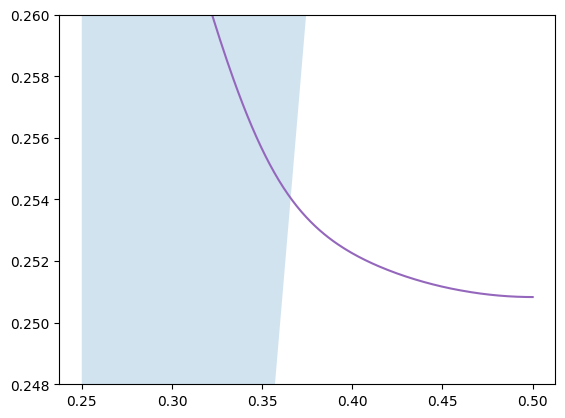

In [5]:
plt.plot(ks/np.pi/2,gme.freqs)
plt.fill_between(ks/2/np.pi,ks/2/np.pi/1.44,1,alpha=.2)
plt.ylim(0.248,0.26)
plt.show()

In [10]:
ngs = []
for i in range(200):
    ngs.append(opt.NG(gme,i,14))
ngs = np.array(ngs)

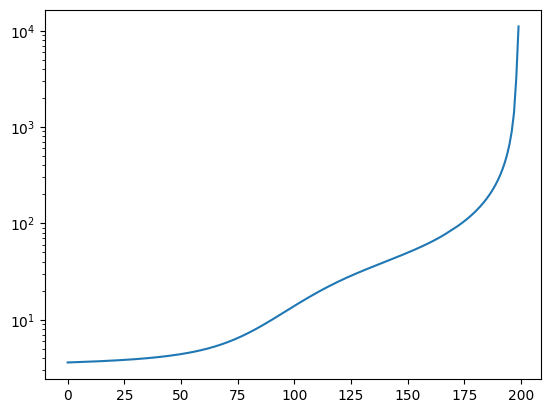

In [7]:
plt.plot(np.abs(ngs))
plt.yscale('log')
plt.show()

In [17]:
import time

start_time = time.time()

minabove = np.sqrt(3)/2
maxbelow = -np.sqrt(3)/2
y_mid = np.sqrt(3)/2*2/5
y_away = np.sqrt(3)/2*3/5

dl = 2/a
x_grid = np.arange(-0.5,0.5,dl)
y_grid = np.hstack([np.arange(-y_away,-y_mid,dl),np.arange(y_mid,y_away,dl)])
X,Y = np.meshgrid(x_grid,y_grid)
field,_,_ = gme.get_field_xy('E',100,14,gme.phc.layers[0].d/2,xgrid=x_grid,ygrid=y_grid)

end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} s")

Elapsed time: 0.6030 s


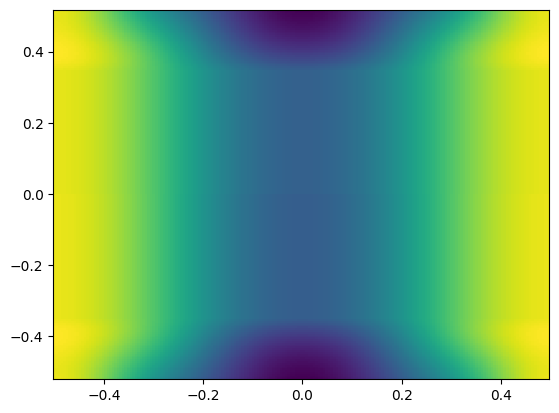

In [18]:
plt.pcolormesh(X,Y,np.abs(field['x'])**2+np.abs(field['y'])**2)

In [34]:

y_mid = np.sqrt(3)/2*4/10
y_away = np.sqrt(3)/2*5/10
tots = []
for i in range(200):
    tot = 0
    for z in range(10):
        dl = 2/a
        x_grid = np.arange(-0.5,0.5,dl)
        y_grid = np.hstack([np.arange(-y_away,-y_mid,dl),np.arange(y_mid,y_away,dl)])
        field,_,_ = gme.get_field_xy('E',i,14,gme.phc.layers[0].d*z/10,xgrid=x_grid,ygrid=y_grid)

        tot += np.sum(np.abs(field['x'])**2+np.abs(field['y'])**2)*dl**2*1e-4*gme.phc.layers[0].d/10
    tots.append(tot*a*1e-3*90)


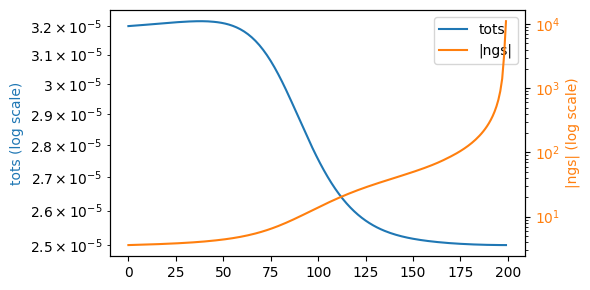

In [36]:
fig, ax1 = plt.subplots(figsize=(6, 3))

ln1 = ax1.plot(tots, color='tab:blue', label='tots')
ax1.set_yscale('log')
ax1.set_ylabel('tots (log scale)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ln2 = ax2.plot(np.abs(ngs), color='tab:orange', label='|ngs|')
ax2.set_yscale('log')
ax2.set_ylabel('|ngs| (log scale)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='best')

plt.tight_layout()
plt.show()


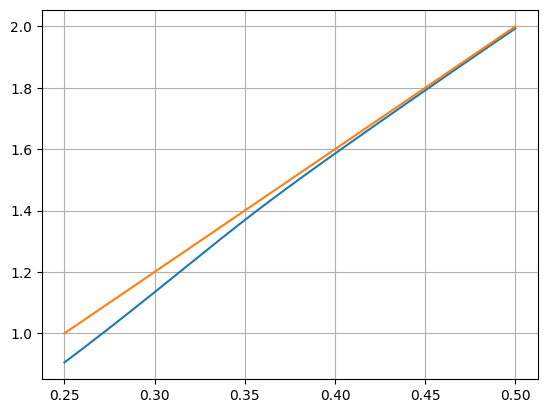

In [45]:
plt.plot(ks/np.pi/2,ks/gme.freqs[:,14]/2/np.pi)
plt.plot(ks/np.pi/2,ks/0.25/2/np.pi)
plt.grid()